# Exploring the Taste of NYC Neighborhoods
> ## IBM Applied Data Science Capstone Project

<a name="tableofcontents"></a>

## Table of Contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis & Machine Learning](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

<a name="introduction"></a><div style="text-align: right">[Scroll Back to Table of Contents](#tableofcontents)</div>

## 1. Introduction

New York City is the most populous city in the United States, home to the headquarters of the United Nations and an important center for international diplomacy. It just might be the most diverse city on the planet, as it is home to over 8.6 million people and over 800 languages.

As quoted in an article - [What Food Tells Us About Culture](https://freelymagazine.com/2017/01/07/what-food-tells-us-about-culture/)  
*"Traditional cuisine is passed down from one generation to the next. It also operates as an expression of cultural identity. Immigrants bring the food of their countries with them wherever they go and cooking traditional food is a way of preserving their culture when they move to new places."*

Undoubtedly, **Food Diversity** is an important part of an ethnically diverse metropolis. The idea of this project is to categorically segment the neighborhoods of New York City into major clusters and examine their cuisines. A desirable intention is to examine the neighborhood cluster's food habits and taste. Further examination might reveal if food has any relationship with the diversity of a neighborhood.

This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.  
**Stakeholders** would be the one who are interested to use this quantifiable analysis to understand the distribution of different cultures and cuisines over "the most diverse city on the planet - NYC". Also, this project can be utilized by a new food vendor who is willing to open his or her restaurant. Or by a government authority to examine and study their city's culture diversity better.

<a name="data"></a><div style="text-align: right">[Scroll Back to Table of Contents](#tableofcontents)</div>

## 2. Data

To examine the above said, following data sources will be used:

1.  **New York City Dataset**
    *  Link: <https://geo.nyu.edu/catalog/nyu_2451_34572>
    *  Description: This New York City Neighborhood Names point file was created as a guide to New York City’s neighborhoods that appear on the web resource, “New York: A City of Neighborhoods.” Best estimates of label centroids were established at a 1:1,000 scale, but are ideally viewed at a 1:50,000 scale. This dataset will provide the addresses of neighborhood of NYC in json format. An extract of the json is as follows:
    ```
	{'type': 'Feature',
	'id': 'nyu_2451_34572.306',
	'geometry': {'type': 'Point',
	'coordinates': [-74.08173992211962, 40.61731079252983]},
	'geometry_name': 'geom',
	'properties': {'name': 'Fox Hills',
	'stacked': 2,
	'annoline1': 'Fox',
	'annoline2': 'Hills',
	'annoline3': None,
	'annoangle': 0.0,
	'borough': 'Staten Island',
	'bbox': [-74.08173992211962,
	40.61731079252983,
	-74.08173992211962,
	40.61731079252983]}}
    ```

2.  **Foursquare API:**
    *  Link: <https://developer.foursquare.com/docs>
    *  Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to [Foursquare Venue Category Hierarchy](https://developer.foursquare.com/docs/resources/categories). Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. An extract of an API call is as follows:
    ```
	'categories': [{'id': '4bf58dd8d48988d110941735',
	   'name': 'Italian Restaurant',
	   'pluralName': 'Italian Restaurants',
	   'shortName': 'Italian',
	   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
	   'suffix': '.png'},
	   'primary': True}],
	'verified': False,
	'stats': {'tipCount': 17},
	'url': 'http://eccorestaurantny.com',
	'price': {'tier': 4, 'message': 'Very Expensive', 'currency'
    ```

<a name="methodology"></a><div style="text-align: right">[Scroll Back to Table of Contents](#tableofcontents)</div>

## 2. Methodology

Download all the dependencies.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

### Download and Explore New York City Dataset

In order to segment the neighborhoods of New York City, a dataset is required that contains the 5 boroughs and the neighborhoods, that exist in each borough, with respective latitude and longitude coordinates.

This dataset exists for free on the web. Here is the link 
* To the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572, and
* To its downloadable json format file: https://cocl.us/new_york_dataset/newyork_data.json

In [2]:
import wget
import os

if os.path.exists('newyork_data.json'):
    os.remove('newyork_data.json')

wget.download('https://cocl.us/new_york_dataset/newyork_data.json')

print('\nData downloaded!')

100% [............................................................................] 115774 / 115774
Data downloaded!


In [3]:
# open & load downloaded file, print its type
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
type(newyork_data)

dict

In [4]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
    print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


All the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[305])

{'geometry': {'coordinates': [-74.08173992211962, 40.61731079252983],
              'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.306',
 'properties': {'annoangle': 0.0,
                'annoline1': 'Fox',
                'annoline2': 'Hills',
                'annoline3': None,
                'bbox': [-74.08173992211962,
                         40.61731079252983,
                         -74.08173992211962,
                         40.61731079252983],
                'borough': 'Staten Island',
                'name': 'Fox Hills',
                'stacked': 2},
 'type': 'Feature'}


#### Tranform the data into a *pandas* dataframe

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [7]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [10]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Define Foursquare Credentials and Version
Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [12]:
CLIENT_ID = 'XOKJYQNJOBDGS1WJQLVWK0KY2MX2LSBS2RQHYZ1IERYGZQM2' # your Foursquare ID
CLIENT_SECRET = 'JMKC15GZW4SFCQV32GOIZTXEJD4IHUGNM5L4U2SEXLBYPLHH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XOKJYQNJOBDGS1WJQLVWK0KY2MX2LSBS2RQHYZ1IERYGZQM2
CLIENT_SECRET:JMKC15GZW4SFCQV32GOIZTXEJD4IHUGNM5L4U2SEXLBYPLHH


**Fetch Foursquare Venue Category Hierarchy**

In [13]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [14]:
category_results

{'meta': {'code': 200, 'requestId': '5dad55ca60ba08001b6cdeac'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

Let's see the structure or the keys of the returned request.

In [15]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [16]:
category_list = category_results['response']['categories']

In [17]:
len(category_list)

10

In [18]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


**_Food_ & It's Sub-Categories**

Let's create a function to return a dictionary with Ids' & Names of _Food_ & It's Sub-Categories.

In [19]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [20]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

In [21]:
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

Now, we have all the categories in _Food_ with their id's.

#### Explore the first neighborhood to understand the results of GET Request

Get the neighborhood's name.

In [22]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [23]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the _Food_ that is in Wakefield within a radius of 500 meters.

First, let's create the GET request URL to search for Venue with requested _Category ID_

In [24]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=XOKJYQNJOBDGS1WJQLVWK0KY2MX2LSBS2RQHYZ1IERYGZQM2&client_secret=JMKC15GZW4SFCQV32GOIZTXEJD4IHUGNM5L4U2SEXLBYPLHH&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

Send the GET request and examine the resutls

In [25]:
results = requests.get(url).json()

In [26]:
results['response']['venues']

[{'id': '4c783cef3badb1f7e4244b54',
  'name': 'Carvel Ice Cream',
  'location': {'address': '1006 E 233rd St',
   'lat': 40.890486685759605,
   'lng': -73.84856772568665,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.890486685759605,
     'lng': -73.84856772568665}],
   'distance': 483,
   'postalCode': '10466',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['1006 E 233rd St',
    'Bronx, NY 10466',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1c9941735',
    'name': 'Ice Cream Shop',
    'pluralName': 'Ice Cream Shops',
    'shortName': 'Ice Cream',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1571640788',
  'hasPerk': False}]

The category name of the venue **'Carvel Ice Cream'** is **'Food'**.

As, our aim is to segment the neighborhoods of NYC with respect to the _Food_ in its vicinity. We need to proceed further to fetch this data from all the 306 neighborhoods' venues.

#### Let's create a function to repeat the following process to all the neighborhoods in NYC:
* Loop through neighborhoods
    * Create the API request URL with radius=500, LIMIT=100
    * Make the GET request
    * For each neighborhood, return only relevant information for each nearby venue
    * Append all nearby venues to a list
* Unfold the list & append it to dataframe being returned

The _categoryId_ parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from _category_\__dict_.

In [27]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)
categoryId

'4d4b7105d754a06374d81259,503288ae91d4c4b30a586d67,4bf58dd8d48988d1c8941735,4bf58dd8d48988d10a941735,4bf58dd8d48988d14e941735,4bf58dd8d48988d157941735,4bf58dd8d48988d142941735,56aa371be4b08b9a8d573568,52e81612bcbc57f1066b7a03,4bf58dd8d48988d145941735,52af3a5e3cf9994f4e043bea,52af3a723cf9994f4e043bec,52af3a7c3cf9994f4e043bed,58daa1558bbb0b01f18ec1d3,52af3a673cf9994f4e043beb,52af3a903cf9994f4e043bee,4bf58dd8d48988d1f5931735,52af3a9f3cf9994f4e043bef,52af3aaa3cf9994f4e043bf0,52af3ab53cf9994f4e043bf1,52af3abe3cf9994f4e043bf2,52af3ac83cf9994f4e043bf3,52af3ad23cf9994f4e043bf4,52af3add3cf9994f4e043bf5,52af3af23cf9994f4e043bf7,52af3ae63cf9994f4e043bf6,52af3afc3cf9994f4e043bf8,52af3b053cf9994f4e043bf9,52af3b213cf9994f4e043bfa,52af3b293cf9994f4e043bfb,52af3b343cf9994f4e043bfc,52af3b3b3cf9994f4e043bfd,52af3b463cf9994f4e043bfe,52af3b633cf9994f4e043c01,52af3b513cf9994f4e043bff,52af3b593cf9994f4e043c00,52af3b6e3cf9994f4e043c02,52af3b773cf9994f4e043c03,52af3b813cf9994f4e043c04,52af3b893cf9994f4e043c05

The above process turns out to be redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name.

In [28]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

**Let's use pickle library to serialize the information retrieved from GET requests. This step will counter any redundant requests to the Foursquare API.**

In [29]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


<a name="analysis"></a><div style="text-align: right">[Scroll Back to Table of Contents](#tableofcontents)</div>

## 3. Analysis & Machine Learning

#### Let's check the size of the resulting dataframe

In [30]:
print(nyc_venues.shape)
nyc_venues.head()

(14047, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Pitman Deli,40.894149,-73.845748,Food
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Burger King,40.895532,-73.856436,Fast Food Restaurant
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


#### Let's find out how many unique categories can be curated from all the returned venues

In [31]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 194 uniques categories.


Venue Category
Deli / Bodega                               1136
Pizza Place                                 1078
Coffee Shop                                  919
Donut Shop                                   710
Fast Food Restaurant                         664
Chinese Restaurant                           619
Italian Restaurant                           544
Bakery                                       544
American Restaurant                          428
Café                                         401
Caribbean Restaurant                         359
Bagel Shop                                   357
Mexican Restaurant                           352
Sandwich Place                               332
Diner                                        313
Ice Cream Shop                               256
Fried Chicken Joint                          254
Restaurant                                   224
Food                                         204
Burger Joint                                 204
Seafo

As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [32]:
# list all the categories
unique_categories = nyc_venues['Venue Category'].unique().tolist()
unique_categories

['Dessert Shop',
 'Food',
 'Ice Cream Shop',
 'Fast Food Restaurant',
 'Donut Shop',
 'Caribbean Restaurant',
 'Bakery',
 'Sandwich Place',
 'Italian Restaurant',
 'Comfort Food Restaurant',
 'Fried Chicken Joint',
 'Deli / Bodega',
 'Food Truck',
 'Chinese Restaurant',
 'Pizza Place',
 'Southern / Soul Food Restaurant',
 'Halal Restaurant',
 'Asian Restaurant',
 'Bagel Shop',
 'American Restaurant',
 'Burger Joint',
 'Restaurant',
 'Mexican Restaurant',
 'Seafood Restaurant',
 'Frozen Yogurt Shop',
 'Spanish Restaurant',
 'Steakhouse',
 'BBQ Joint',
 'Coffee Shop',
 'Dumpling Restaurant',
 'Diner',
 'Wings Joint',
 'Café',
 'Juice Bar',
 'Breakfast Spot',
 'Grocery Store',
 'Latin American Restaurant',
 'Tapas Restaurant',
 'Japanese Restaurant',
 'Bar',
 'Sushi Restaurant',
 'Greek Restaurant',
 'Indian Restaurant',
 'Thai Restaurant',
 'Korean Restaurant',
 'New American Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Cupcake Shop',
 'Cuban Restaurant',
 'Pub',
 'Fish & Chips Shop'

In [33]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [34]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
food_categories

['Noodle House',
 'Pakistani Restaurant',
 'Empanada Restaurant',
 'Ukrainian Restaurant',
 'Dosa Place',
 'American Restaurant',
 'Thai Restaurant',
 'Lebanese Restaurant',
 'Southern / Soul Food Restaurant',
 'Australian Restaurant',
 'Filipino Restaurant',
 'Salvadoran Restaurant',
 'Burmese Restaurant',
 'English Restaurant',
 'Kebab Restaurant',
 'Greek Restaurant',
 'Shabu-Shabu Restaurant',
 'Mediterranean Restaurant',
 'Turkish Restaurant',
 'Falafel Restaurant',
 'Szechuan Restaurant',
 'Hong Kong Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Malay Restaurant',
 'Brazilian Restaurant',
 'Dim Sum Restaurant',
 'Jewish Restaurant',
 'Varenyky restaurant',
 'Tex-Mex Restaurant',
 'Fried Chicken Joint',
 'Spanish Restaurant',
 'Latin American Restaurant',
 'Austrian Restaurant',
 'Kosher Restaurant',
 'New American Restaurant',
 'Caucasian Restaurant',
 'Russian Restaurant',
 'Ethiopian Restaurant',
 'Moroccan Restaurant',
 'Middle Eastern Restaurant',
 'Asian Restaurant',
 'So

Let's remove all the generalized categories, like Coffee Shop, Cafe, etc.

In [35]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3,Wakefield,40.894705,-73.847201,Burger King,40.895532,-73.856436,Fast Food Restaurant
1,5,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898276,-73.850381,Caribbean Restaurant
2,9,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
3,10,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
4,11,Wakefield,40.894705,-73.847201,Frank and Johnies,40.905019,-73.858392,Italian Restaurant


In [36]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 92 unique FOOD categories.


#### Let's find out how many unique venues can be curated from all the returned venues

In [37]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 3323 uniques venues.


### Analyze Each Neighborhood

In [38]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield


In [40]:
# move neighborhood column to the first column
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [41]:
nyc_onehot.shape

(6846, 93)

Let's count venues of each category in each neighborhood

In [42]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's find out the top 10 food categories in NYC

In [43]:
venue_counts_described = venue_counts.describe().transpose()

In [44]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Korean Restaurant,302.0,0.291391,1.828491,0.0,0.0,0.0,0.0,29.0
Chinese Restaurant,302.0,2.049669,2.083199,0.0,1.0,2.0,3.0,17.0
Caribbean Restaurant,302.0,1.188742,2.785965,0.0,0.0,0.0,1.0,16.0
Indian Restaurant,302.0,0.324503,1.123885,0.0,0.0,0.0,0.0,15.0
Fast Food Restaurant,302.0,2.198675,2.054150,0.0,1.0,2.0,3.0,11.0
Italian Restaurant,302.0,1.801325,1.983386,0.0,0.0,1.0,3.0,11.0
Pizza Place,302.0,3.569536,2.190314,0.0,2.0,3.0,5.0,10.0
Seafood Restaurant,302.0,0.513245,0.849950,0.0,0.0,0.0,1.0,7.0
New American Restaurant,302.0,0.357616,0.745702,0.0,0.0,0.0,0.0,6.0
Thai Restaurant,302.0,0.311258,0.726210,0.0,0.0,0.0,0.0,6.0


In [45]:
venue_top10_list = venue_top10.index.values.tolist()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

<Figure size 2000x2000 with 10 Axes>

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Allerton,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.120000,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120000,0.0,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.160000,0.000000,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.176471,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.058824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.352941,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.176471,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.294118,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.105263,0.0,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.210526,0.052632,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.055556,0.0,0.0,0.0,0.0,0.055556,0.0

#### Let's confirm the new size

In [48]:
nyc_grouped.shape

(302, 93)

#### Let's write a function to sort the venues in descending order.

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [50]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [51]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [52]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Mexican Restaurant,Fried Chicken Joint,Pizza Place,Chinese Restaurant,Fast Food Restaurant
1,Annadale,Pizza Place,American Restaurant,Sushi Restaurant,Italian Restaurant,Japanese Restaurant
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant
4,Arrochar,Italian Restaurant,Pizza Place,Steakhouse,Middle Eastern Restaurant,Chinese Restaurant


### Cluster Neighborhoods

Run *k*-means to count Neighborhoods for each cluster label for variable cluster size

In [53]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

#### Determine the optimal number of clusters for k-means clustering

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [54]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

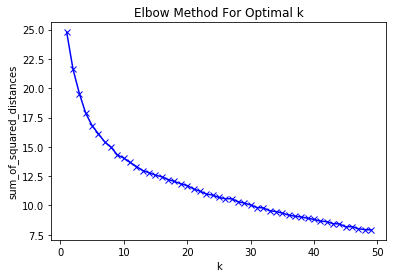

In [55]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [56]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

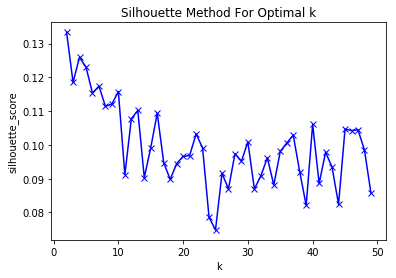

In [57]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k = 4 and k = 8. Two and four clusters will give a very broad classification of the venues.
#### Let's set number of clusters = 8

In [58]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({7: 74, 6: 53, 3: 46, 1: 42, 4: 36, 0: 28, 2: 22, 5: 1})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [59]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [60]:
neighborhoods_venues_sorted.head(50)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,3,Allerton,Mexican Restaurant,Fried Chicken Joint,Pizza Place,Chinese Restaurant,Fast Food Restaurant
1,6,Annadale,Pizza Place,American Restaurant,Sushi Restaurant,Italian Restaurant,Japanese Restaurant
2,6,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant
3,3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant
4,1,Arrochar,Italian Restaurant,Pizza Place,Steakhouse,Middle Eastern Restaurant,Chinese Restaurant
5,0,Arverne,Chinese Restaurant,Pizza Place,American Restaurant,Asian Restaurant,Thai Restaurant
6,7,Astoria,Greek Restaurant,Pizza Place,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant
7,1,Astoria Heights,Italian Restaurant,Chinese Restaurant,Greek Restaurant,Pizza Place,Sushi Restaurant
8,7,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place,Italian Restaurant,American Restaurant
9,0,Bath Beach,Chinese Restaurant,Fast Food Restaurant,Cantonese Restaurant,Sushi Restaurant,Vietnamese Restaurant


In [61]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,3,Allerton,Mexican Restaurant,Fried Chicken Joint,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Bronx,40.865788,-73.859319
1,6,Annadale,Pizza Place,American Restaurant,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Staten Island,40.538114,-74.178549
2,6,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Staten Island,40.549286,-74.185887
3,3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant,Staten Island,40.635325,-74.165104
4,1,Arrochar,Italian Restaurant,Pizza Place,Steakhouse,Middle Eastern Restaurant,Chinese Restaurant,Staten Island,40.596313,-74.067124


Finally, let's visualize the resulting clusters

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item6'></a>

In [63]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### Cluster 0

In [64]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
5,Arverne,Chinese Restaurant,Pizza Place,American Restaurant,Asian Restaurant,Thai Restaurant,Queens,40.589144,-73.791992
9,Bath Beach,Chinese Restaurant,Fast Food Restaurant,Cantonese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Brooklyn,40.599519,-73.998752
15,Bayswater,Chinese Restaurant,Pizza Place,Fried Chicken Joint,Caribbean Restaurant,American Restaurant,Queens,40.611322,-73.765968
23,Bensonhurst,Chinese Restaurant,Pizza Place,Cantonese Restaurant,Japanese Restaurant,Italian Restaurant,Brooklyn,40.611009,-73.995180
37,Brownsville,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Caribbean Restaurant,Southern / Soul Food Restaurant,Brooklyn,40.663950,-73.910235


In [65]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chinese Restaurant     18
Pizza Place             7
Indian Restaurant       2
American Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place             9
Chinese Restaurant      7
Caribbean Restaurant    4
Fast Food Restaurant    3
Italian Restaurant      1
American Restaurant     1
Cantonese Restaurant    1
Mexican Restaurant      1
Fried Chicken Joint     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Queens           18
Brooklyn          7
Staten Island     2
Bronx             1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 1

In [66]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
4,Arrochar,Italian Restaurant,Pizza Place,Steakhouse,Middle Eastern Restaurant,Chinese Restaurant,Staten Island,40.596313,-74.067124
7,Astoria Heights,Italian Restaurant,Chinese Restaurant,Greek Restaurant,Pizza Place,Sushi Restaurant,Queens,40.770317,-73.894680
12,Bay Terrace,Italian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,American Restaurant,Queens,40.782843,-73.776802
12,Bay Terrace,Italian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,American Restaurant,Staten Island,40.553988,-74.139166
18,Beechhurst,Italian Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Queens,40.792781,-73.804365


In [67]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    26
Pizza Place           15
Seafood Restaurant     1
Falafel Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place            15
Italian Restaurant     14
Chinese Restaurant      5
Asian Restaurant        4
Mexican Restaurant      3
American Restaurant     2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    22
Queens           11
Bronx             5
Brooklyn          5
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 2

In [68]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
36,Brookville,Fried Chicken Joint,Caribbean Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Queens,40.660003,-73.751753
41,Cambria Heights,Caribbean Restaurant,Chinese Restaurant,Latin American Restaurant,Pizza Place,Fast Food Restaurant,Queens,40.692775,-73.735269
68,Crown Heights,Caribbean Restaurant,Fast Food Restaurant,Pizza Place,French Restaurant,Mexican Restaurant,Brooklyn,40.670829,-73.943291
77,East Flatbush,Caribbean Restaurant,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Fast Food Restaurant,Brooklyn,40.641718,-73.936103
83,Eastchester,Caribbean Restaurant,Pizza Place,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Bronx,40.887556,-73.827806


In [69]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Caribbean Restaurant    20
Pizza Place              1
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    7
Pizza Place             7
Chinese Restaurant      5
Caribbean Restaurant    2
Fried Chicken Joint     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Brooklyn    10
Queens       7
Bronx        5
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 3

In [70]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,Allerton,Mexican Restaurant,Fried Chicken Joint,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Bronx,40.865788,-73.859319
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant,Staten Island,40.635325,-74.165104
13,Baychester,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Bronx,40.866858,-73.835798
30,Briarwood,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Japanese Restaurant,Queens,40.710935,-73.811748
33,Broadway Junction,Fast Food Restaurant,Fried Chicken Joint,Mexican Restaurant,Chinese Restaurant,Pizza Place,Brooklyn,40.677861,-73.903317


In [71]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    26
Pizza Place             11
Mexican Restaurant       5
Chinese Restaurant       2
Seafood Restaurant       1
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant               13
Pizza Place                        11
Chinese Restaurant                  9
Fried Chicken Joint                 5
Mexican Restaurant                  3
Latin American Restaurant           2
Southern / Soul Food Restaurant     1
Caribbean Restaurant                1
Indian Restaurant                   1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Bronx            23
Queens            8
Brooklyn          7
Manhattan         5
Staten Island     3
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 4

In [72]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
27,Boerum Hill,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Caribbean Restaurant,New American Restaurant,Brooklyn,40.685683,-73.983748
29,Breezy Point,American Restaurant,Pizza Place,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Queens,40.557401,-73.925512
35,Brooklyn Heights,American Restaurant,Pizza Place,Mexican Restaurant,Seafood Restaurant,Mediterranean Restaurant,Brooklyn,40.695864,-73.993782
43,Carnegie Hill,American Restaurant,Vietnamese Restaurant,BBQ Joint,Pizza Place,Fast Food Restaurant,Manhattan,40.782683,-73.953256
44,Carroll Gardens,Pizza Place,French Restaurant,BBQ Joint,American Restaurant,Italian Restaurant,Brooklyn,40.680540,-73.994654


In [73]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant        22
Italian Restaurant          5
Korean Restaurant           2
Seafood Restaurant          2
Pizza Place                 2
New American Restaurant     2
Mexican Restaurant          1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place              7
Italian Restaurant       7
French Restaurant        7
American Restaurant      5
Mexican Restaurant       4
Vietnamese Restaurant    2
Seafood Restaurant       1
Fast Food Restaurant     1
BBQ Joint                1
Noodle House             1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan    21
Brooklyn     10
Queens        3
Bronx         2
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 5

In [74]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
152,Lighthouse Hill,Italian Restaurant,Vietnamese Restaurant,Halal Restaurant,English Restaurant,Ethiopian Restaurant,Staten Island,40.576506,-74.137927


In [75]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 6

In [76]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
1,Annadale,Pizza Place,American Restaurant,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Staten Island,40.538114,-74.178549
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Staten Island,40.549286,-74.185887
16,Bedford Park,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Salvadoran Restaurant,Fried Chicken Joint,Bronx,40.870185,-73.885512
19,Bellaire,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Queens,40.733014,-73.738892
21,Bellerose,Pizza Place,Indian Restaurant,American Restaurant,Halal Restaurant,Seafood Restaurant,Queens,40.728573,-73.720128


In [77]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            52
Taco Place              1
American Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant      11
American Restaurant     10
Japanese Restaurant      5
Fast Food Restaurant     5
Italian Restaurant       4
Mexican Restaurant       4
Sushi Restaurant         3
Caribbean Restaurant     2
BBQ Joint                2
Asian Restaurant         2
Taco Place               2
Falafel Restaurant       1
Spanish Restaurant       1
Pizza Place              1
Indian Restaurant        1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    22
Queens           13
Bronx            10
Brooklyn          9
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 7

In [78]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
6,Astoria,Greek Restaurant,Pizza Place,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Queens,40.768509,-73.915654
8,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place,Italian Restaurant,American Restaurant,Queens,40.761730,-73.791762
10,Battery Park City,Seafood Restaurant,Italian Restaurant,Pizza Place,Fast Food Restaurant,New American Restaurant,Manhattan,40.711932,-74.016869
11,Bay Ridge,Fast Food Restaurant,Pizza Place,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Brooklyn,40.625801,-74.030621
14,Bayside,American Restaurant,Korean Restaurant,Italian Restaurant,Greek Restaurant,Fast Food Restaurant,Queens,40.766041,-73.774274


In [79]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place                      25
Italian Restaurant               14
Fast Food Restaurant              9
American Restaurant               5
Korean Restaurant                 5
Thai Restaurant                   3
Sushi Restaurant                  2
Seafood Restaurant                2
Vegetarian / Vegan Restaurant     2
Greek Restaurant                  2
Vietnamese Restaurant             1
Indian Restaurant                 1
New American Restaurant           1
Middle Eastern Restaurant         1
Eastern European Restaurant       1
Mexican Restaurant                1
Ramen Restaurant                  1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant               16
Fast Food Restaurant             12
Pizza Place                       9
American Restaurant               6
Mexican Restaurant                5
Vietnamese Restaurant             3
BBQ Joint                         3
Asian Restaurant                  2
Turkish Rest

### Thank You

* References: Notebook created by [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lin](https://www.linkedin.com/in/polonglin/) for the course on **Coursera** called *Applied Data Science Capstone*

<hr>